# PGP Web of Trust visualization

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from math import log
import random, logging, sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from utils.gen import kleinberg_ring, kleinberg
from utils.search import greedy_path, average_greedy_path_length, RoutingError
from utils.misc import shuffle_position_ring, dist_ring, labels_from_attr, switch_nodes, color_path

logger = logging.getLogger('main')
logging.basicConfig(level=logging.INFO, stream=sys.stderr)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["font.size"] = 30

def draw_autocrop(G):
    pos = nx.circular_layout(G)
    cut = 1.05
    xmax= cut*max(xx for xx,yy in pos.values())
    ymax= cut*max(yy for xx,yy in pos.values())
    plt.xlim(-xmax,xmax)
    plt.ylim(-ymax,ymax)
    return pos


In [9]:
G = nx.read_graphml('data/wot_default.graphml')
logger.info("nodes: %s", G.number_of_nodes())
logger.info("edges: %s", G.number_of_edges())

INFO:main:nodes: 48983
INFO:main:edges: 183840


In [70]:
# average shortest path length = 6.598257086979384

## Degree rank

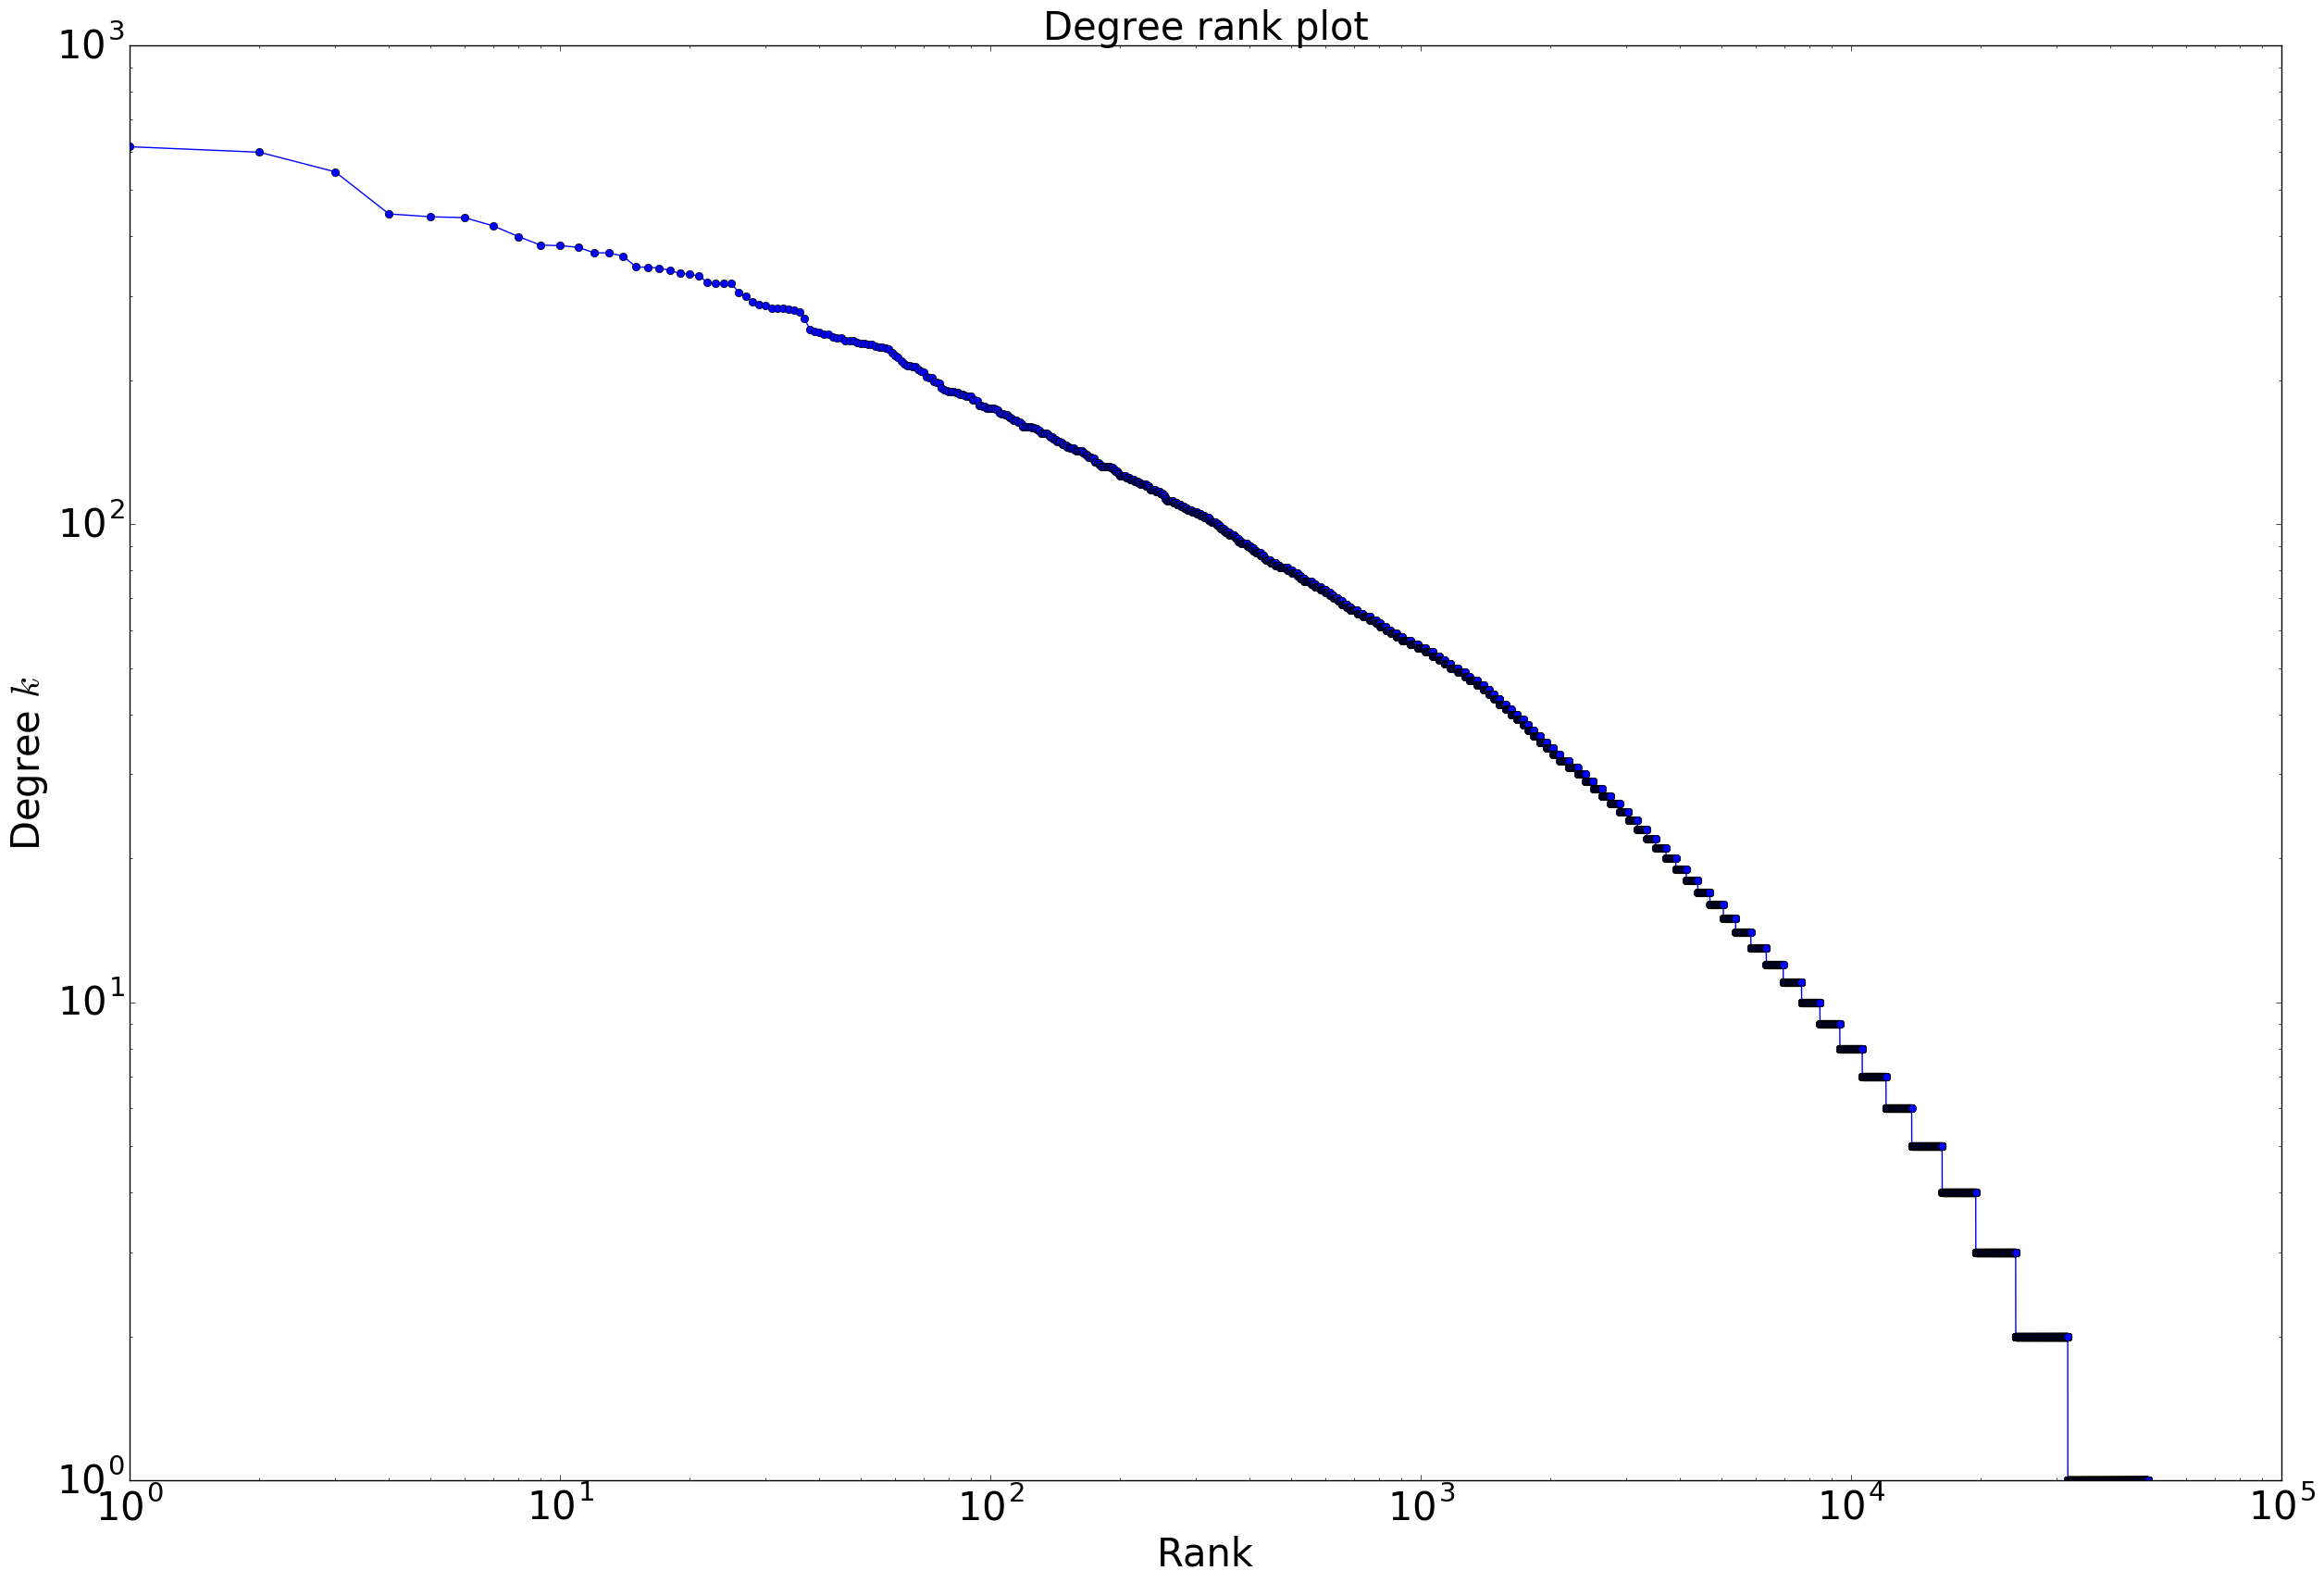

In [10]:
# degree rank
degree_sequence=sorted(nx.degree(G).values(),reverse=True)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("Degree $k$")
plt.xlabel("Rank")
plt.show()

## Degree distribution (loglog)

In [11]:
degree_sequence=sorted(nx.degree(G).values())
hist={} # {degree k: number of v with deg k}
for d in degree_sequence:
    if d in hist:
        hist[d]+=1
    else:
        hist[d]=1

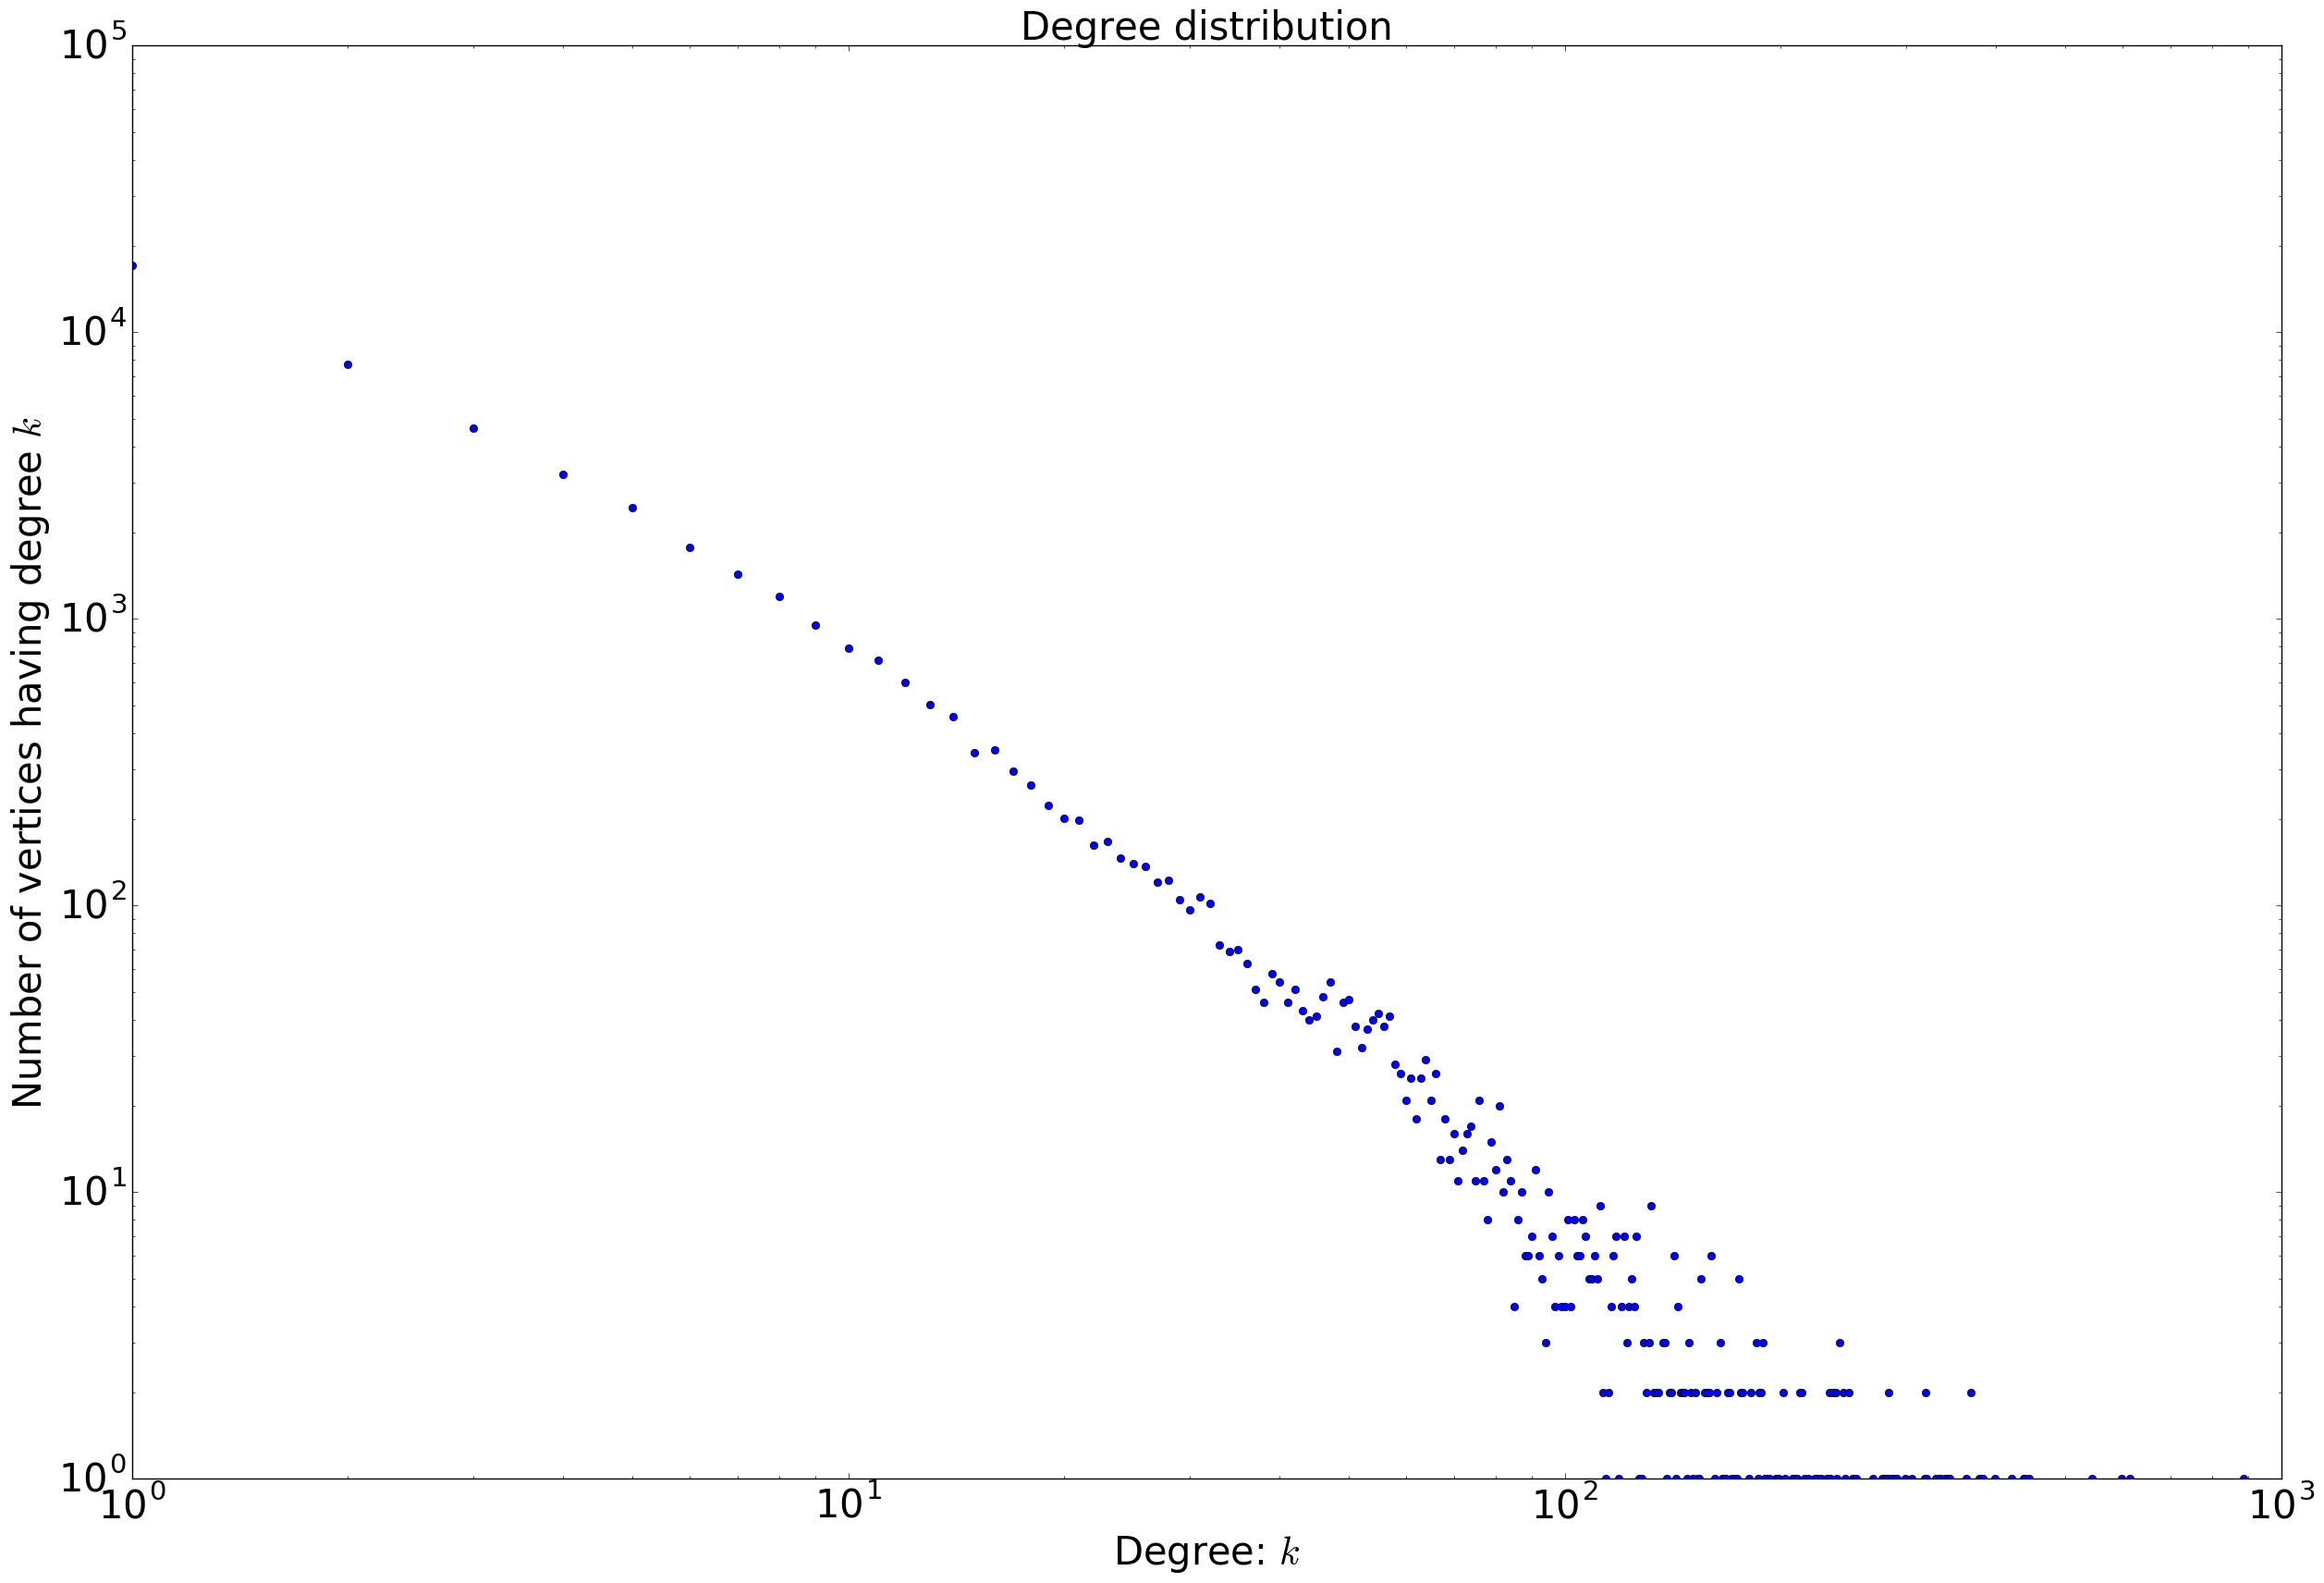

In [12]:
# degree dist
plt.loglog(list(hist.keys()), list(hist.values()),'bo')
plt.title("Degree distribution")
plt.ylabel("Number of vertices having degree $k$")
plt.xlabel("Degree: $k$")
plt.savefig('data/wot_degree_distribution.png')
plt.show()

## Degree distribution (log)

In [13]:
size = G.number_of_nodes()
hist_frac = {}
for d in hist.keys():
    hist_frac[d] = hist[d] / size

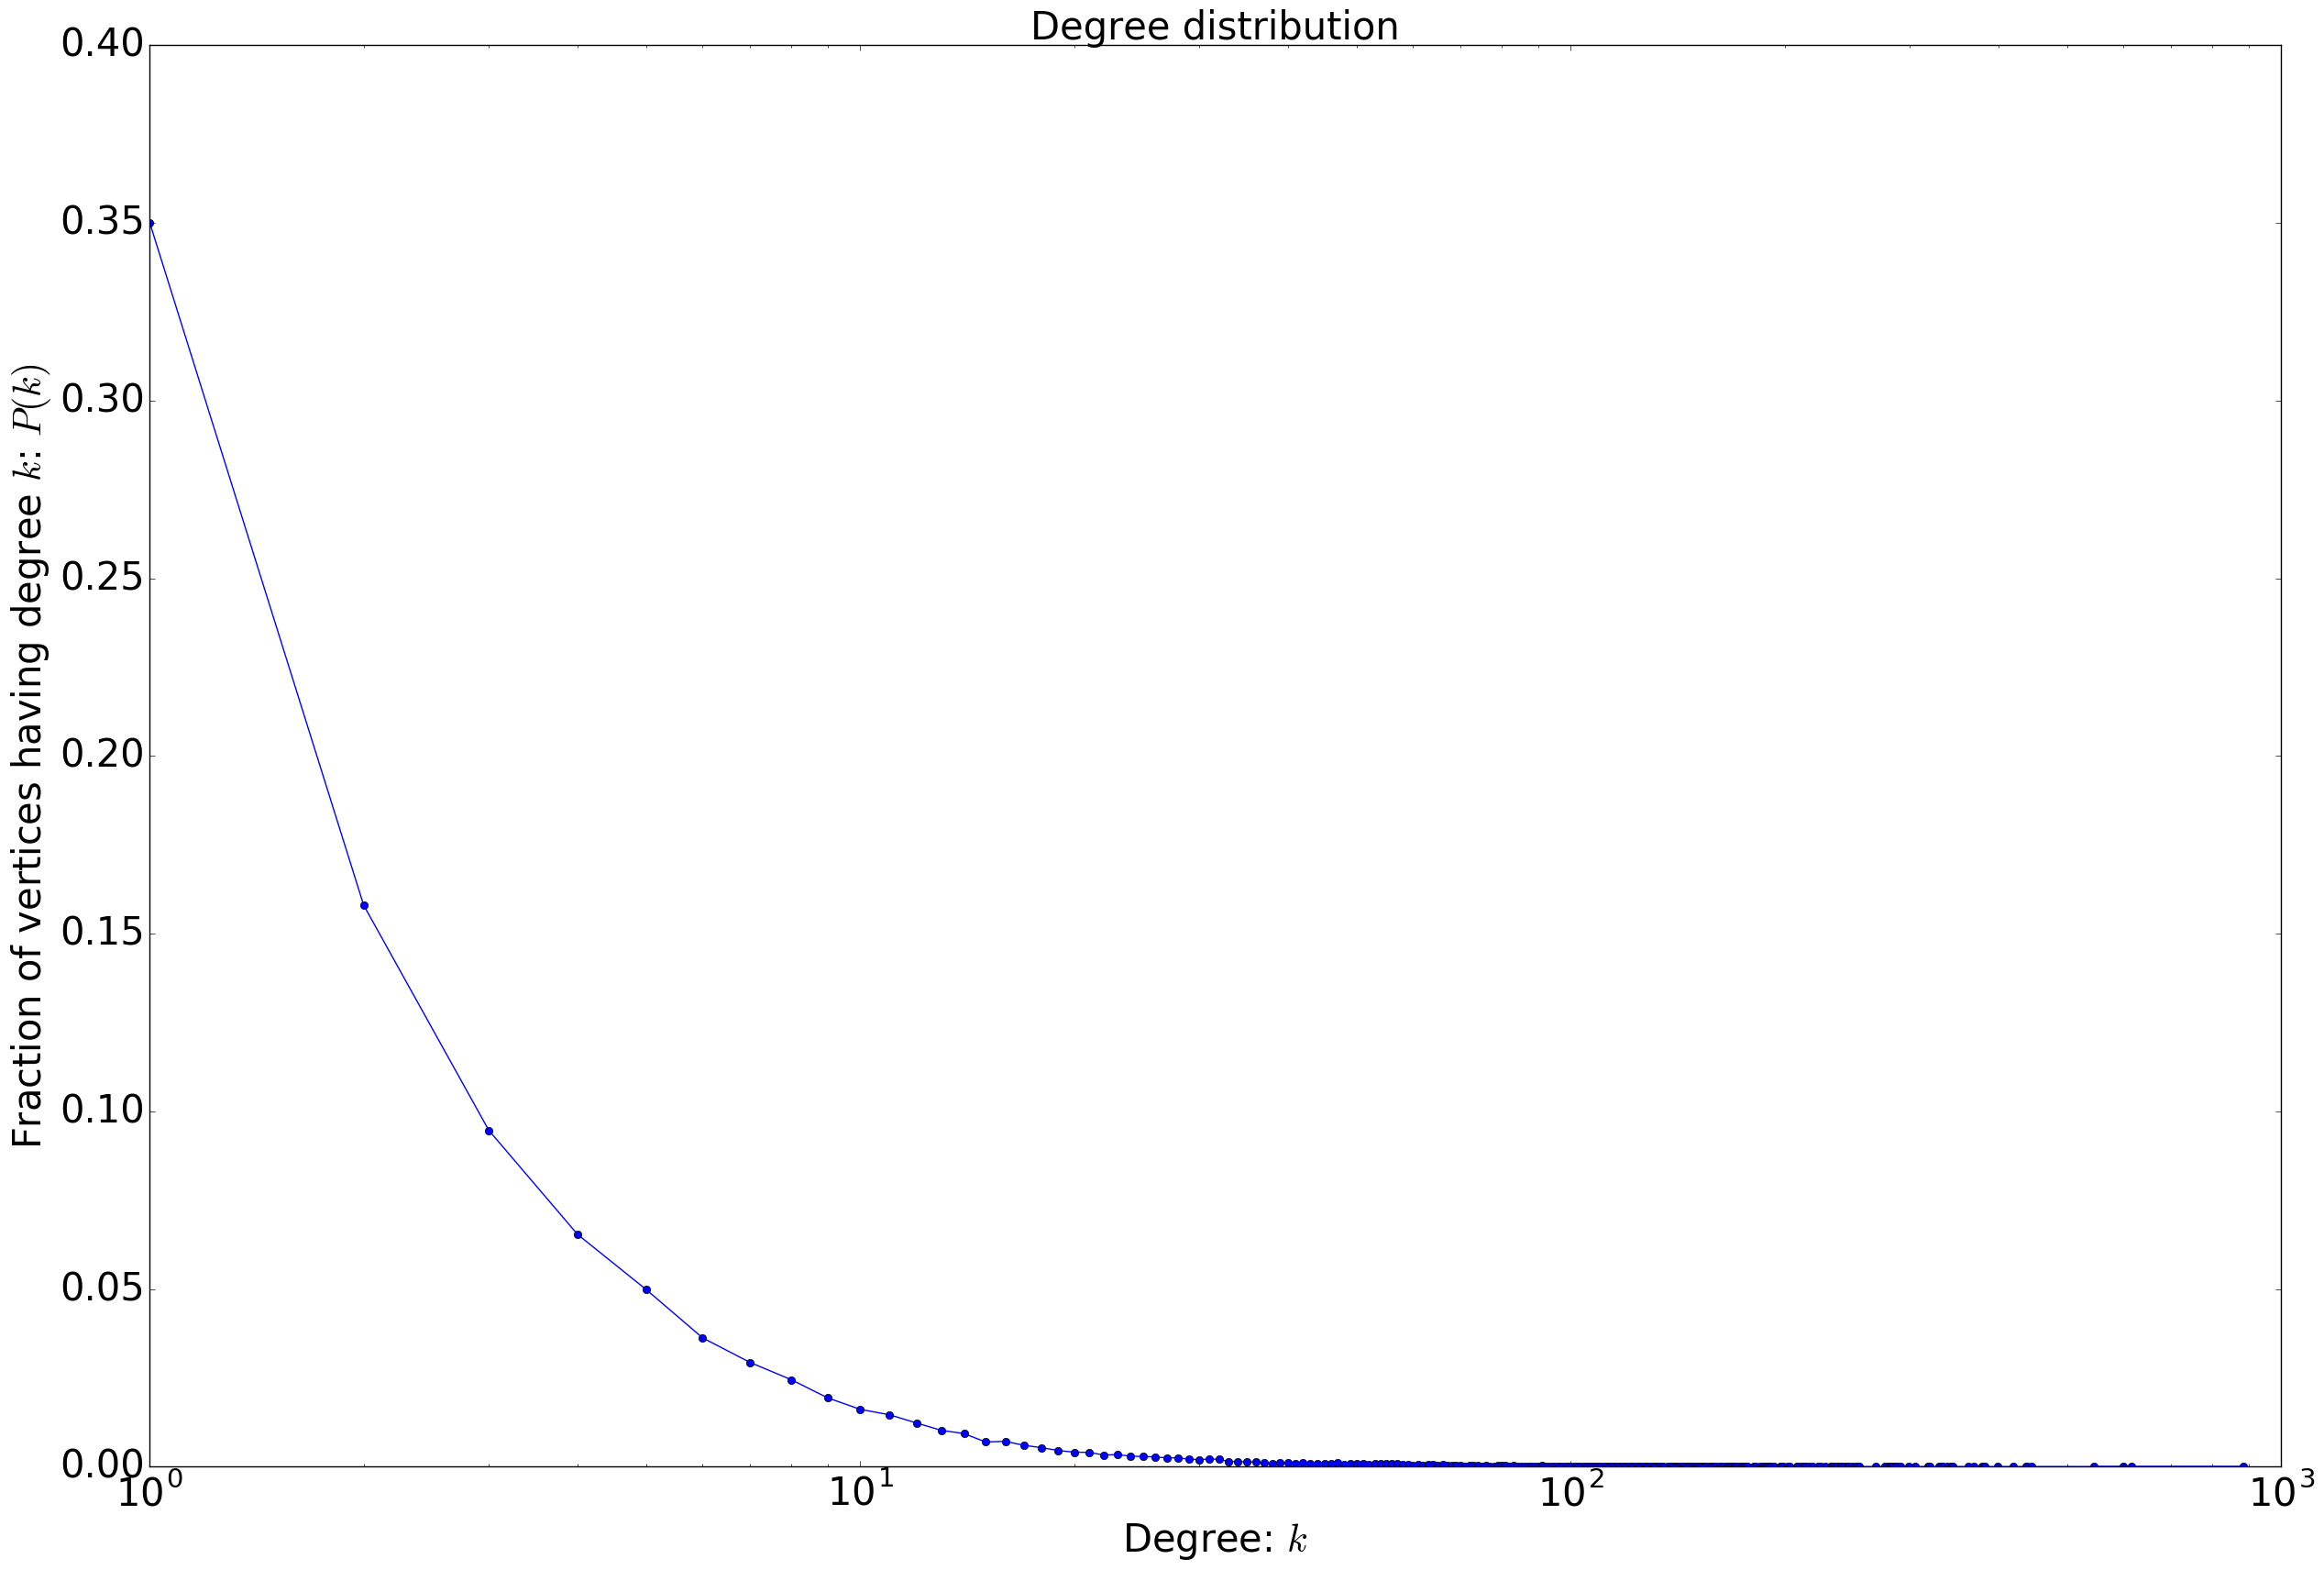

In [14]:
plt.semilogx(list(hist_frac.keys()), list(hist_frac.values()),'b-',marker='o')
plt.title("Degree distribution")
plt.ylabel("Fraction of vertices having degree $k$: $P(k)$")
plt.xlabel("Degree: $k$")
plt.show()

## Cumulative distribution function (loglog)

In [15]:
hist_frac_cml = {}
degs = sorted(hist.keys(), reverse=True)
pre = 0 
for d in sorted(hist_frac.keys(), reverse=True):
    hist_frac_cml[d] = pre = pre + hist_frac[d]

xlist = []
ylist = []
for d in sorted(hist_frac_cml.keys()):
    xlist.append(d)
    ylist.append(hist_frac_cml[d])

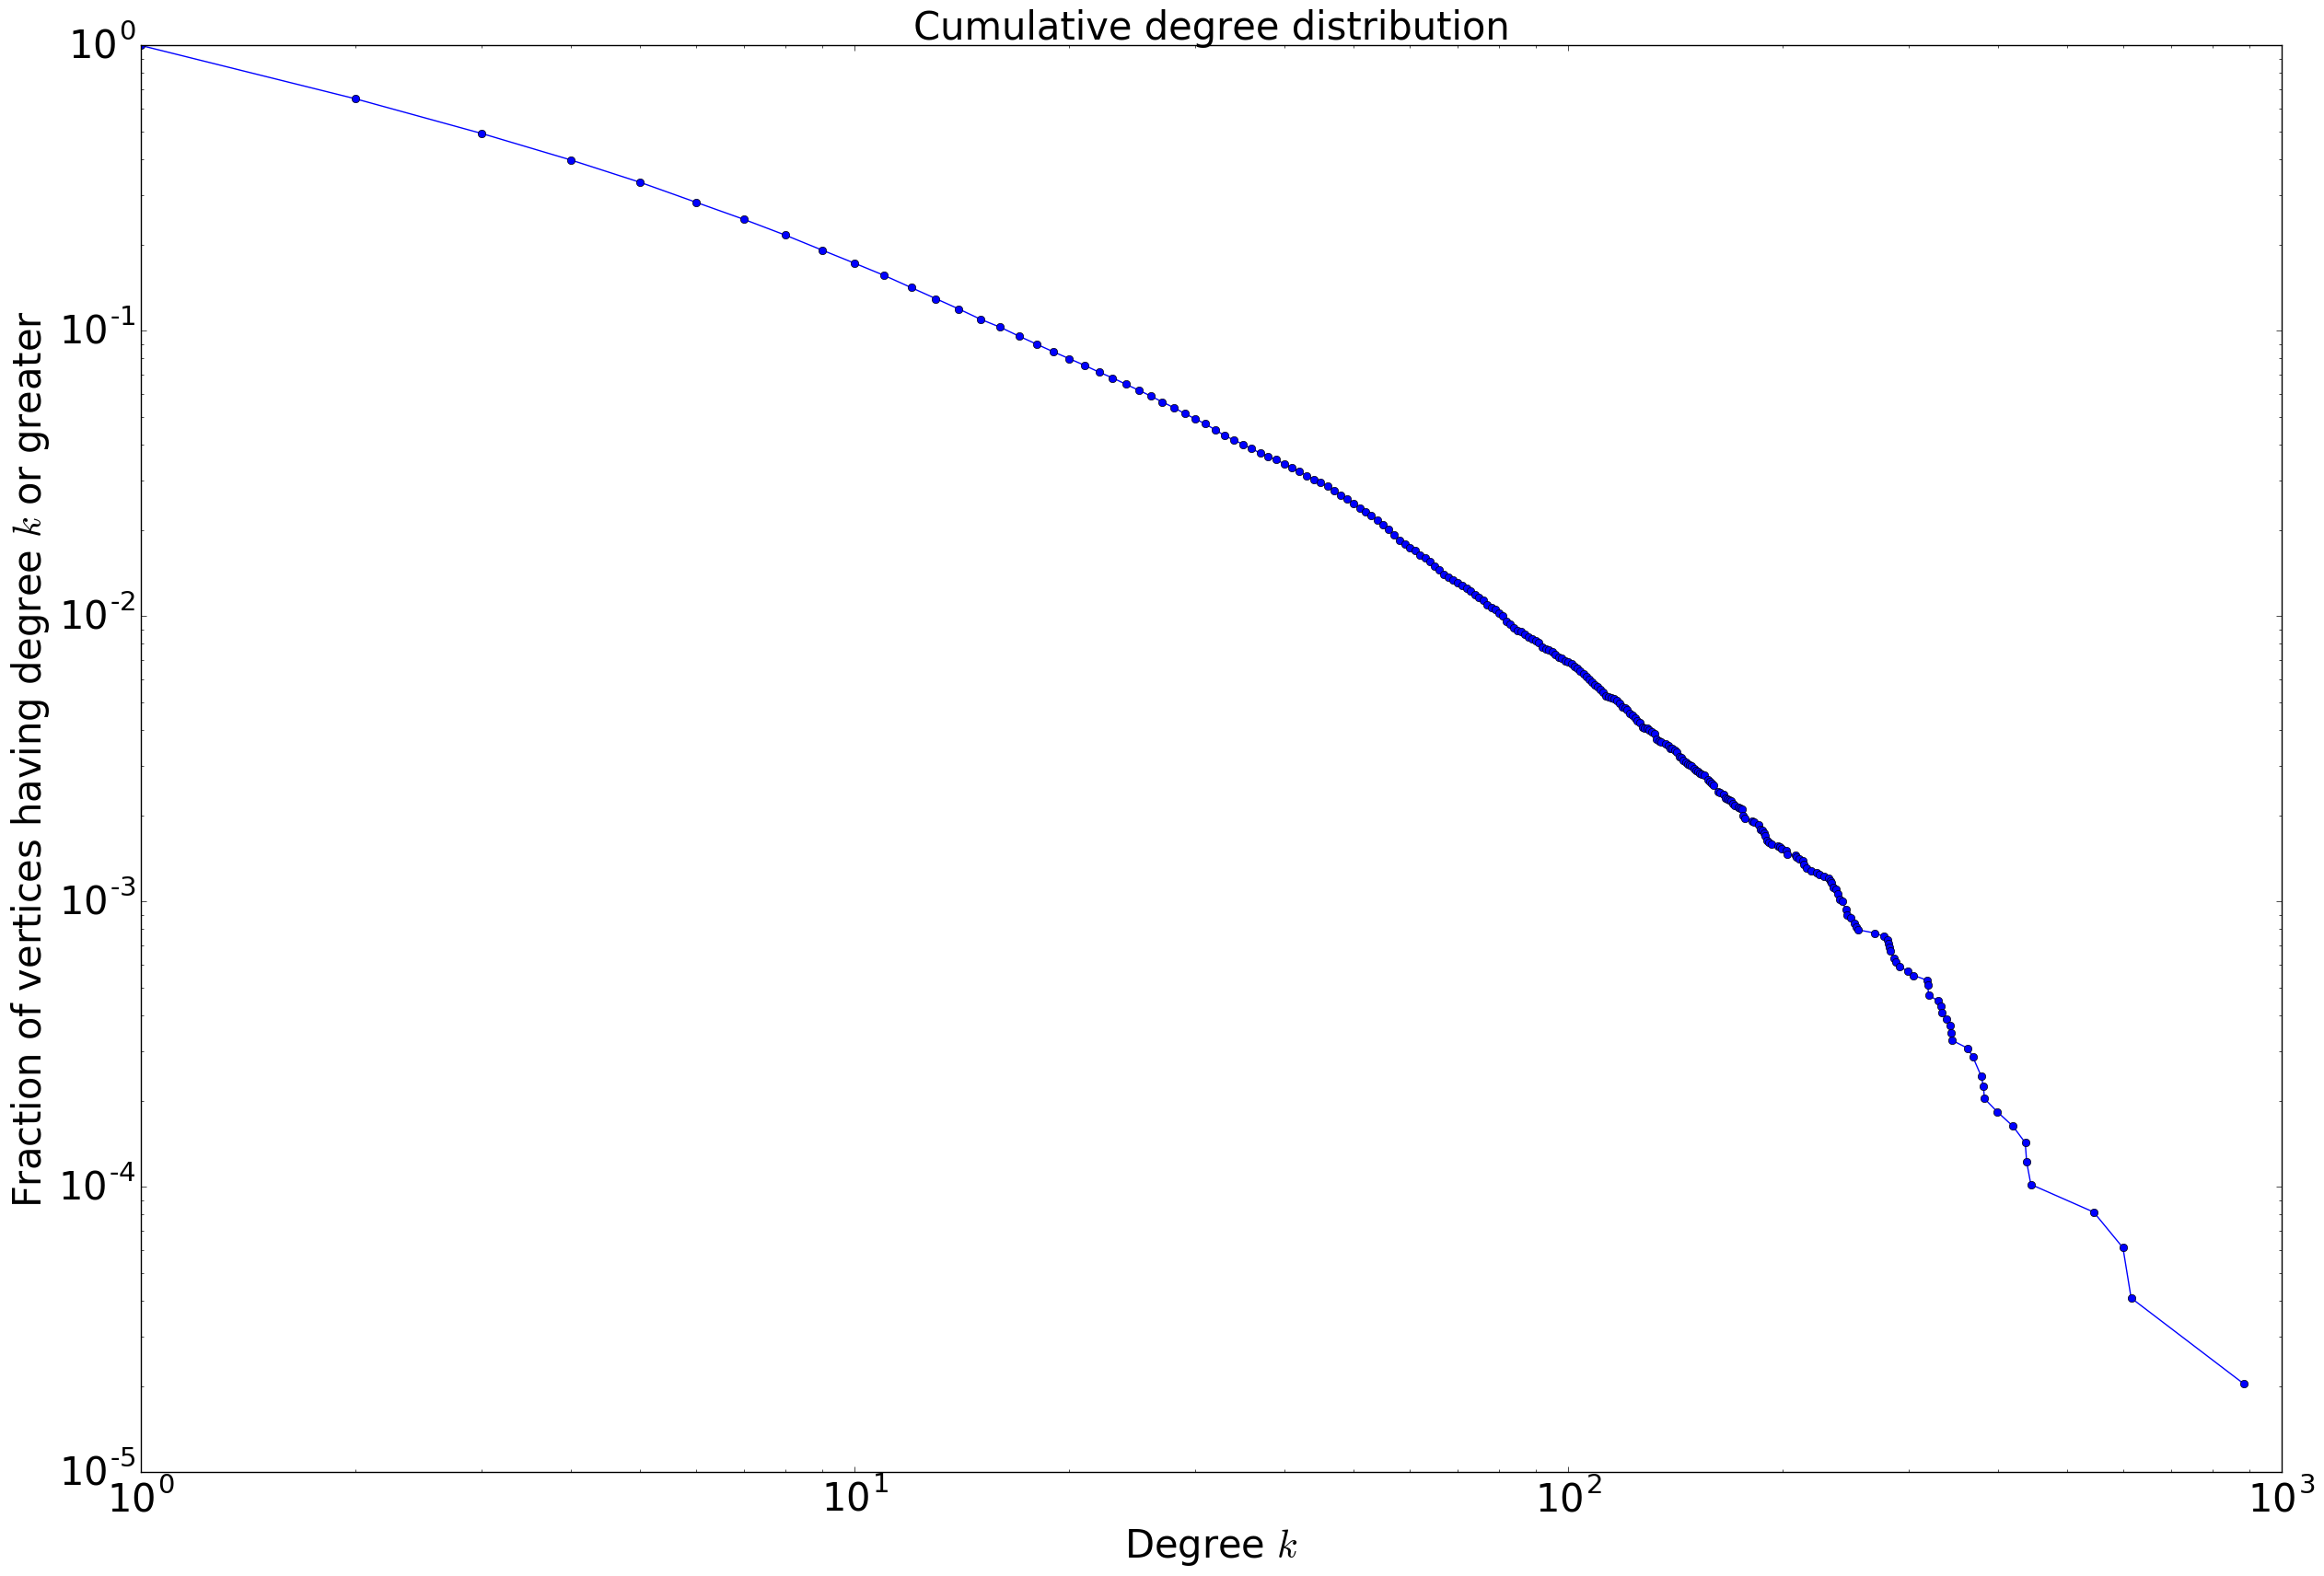

In [16]:
plt.loglog(xlist, ylist,'b-',marker='o')
plt.title("Cumulative degree distribution")
plt.ylabel("Fraction of vertices having degree $k$ or greater")
plt.xlabel("Degree $k$")
plt.show()